In [1049]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

Загрузим файл с данными, которые ранее были получены с помощью парсинг сайта по продаже телефонов.

In [914]:
df = pd.read_csv('project_data')
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

,Name,Price,Articul,Screen,Inch,Main camera,Second camera,Processor name,Processor rate,Internal memory,RAM,Battery
0,Xiaomi Redmi Note 11 NFC 4 64Gb RU Star Blue,11790,111788,2400x1080,6.43,50.0,13.0,Snapdragon 680 4G,2.4,64.0,4.0,5000.0
1,Xiaomi Redmi 10C 4 64Gb RU Green,8350,114089,1650x720,6.71,50.0,5.0,Snapdragon 680 4G,2.4,64.0,4.0,5000.0
2,Xiaomi Redmi Note 12 6 128Gb NFC RU Onyx Gray,15350,126457,2400x1080,6.67,50.0,13.0,Snapdragon 685,2.8,128.0,6.0,5000.0
3,Realme C55 8 256Gb Black,14850,126955,2400x1080,6.72,64.0,8.0,Helio G88,2.0,256.0,8.0,5000.0
4,Xiaomi Redmi 10C 4 64Gb RU Blue,8350,112138,1650x720,6.71,50.0,5.0,Snapdragon 680 4G,2.4,64.0,4.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
514,Xiaomi Redmi Note 12 Pro 5G 6 128Gb EU Blue,26990,118992,2400x1080,6.67,50.0,16.0,Dimensity 1080,2.6,128.0,6.0,5000.0
515,Xiaomi Redmi Note 12 Pro 5G 8 128Gb EU Blue,28990,118995,2400x1080,6.67,50.0,16.0,Dimensity 1080,2.6,128.0,8.0,5000.0
516,Xiaomi Redmi Note 12 Pro 5G 8 128Gb EU Pink,28990,118994,2400x1080,6.67,50.0,16.0,Dimensity 1080,2.6,128.0,8.0,5000.0
517,Xiaomi Redmi Note 12 Pro 5G 8 128Gb EU White,28990,118996,2400x1080,6.67,50.0,16.0,Dimensity 1080,2.6,128.0,8.0,5000.0


Описание переменных:

- Name - полное название телефона
- Price - цена 
- Articul - артикул на сайте
- Screen - разрешение экрана
- Inch - диагональ смартфона (в дюймах)
- Main camera - основная камера(в мп)
- Second camera - фронтальная камера (в мп)
- Processor name - модель процессора
- Processor rate - частота процессора (в ГГц)
- Internal memory - встроенная память (в ГБ)
- RAM - оперативная память (в ГБ)
- Battery - характеристика аккумулятора

Необходимо обработать разрешение экрана, чтобы сделать его числовым. 

In [915]:
a = 0
for i in df['Screen']:
    if 'х' in str(i):
        a = i.split('х')
        df = df.replace(i, int(a[1]))
    elif 'x' in str(i):
        a = i.split('x')
        df = df.replace(i, int(a[1]))
    else:
        df = df.replace(i, None)

Займемся обработкой пропусков. Для начала посмотрим на их количество по каждому признаку:

In [916]:
df.isnull().sum()

Name                0
Price               0
Articul             0
Screen             15
Inch               15
Main camera        26
Second camera      77
Processor name     91
Processor rate     91
Internal memory    71
RAM                75
Battery            88
dtype: int64

Я буду заполнять None значения модой по каждому столбцу соответственно, так как использовать среднее в данном случае будет не лучшим вариантом, ведь переменные могут принимать только конкретные значения. Подсчет среднего может привести к тому, что средним значением будет, например, RAM=7,25, однако данный показатель не может принимать дробное значение. 

In [917]:
df['Screen'][df['Screen'].isnull()] = df['Screen'].mode()[0]  # заполняем пропуски в столбце "Screen"
df['Inch'][df['Inch'].isnull()] = df['Inch'].mode()[0]  # заполняем пропуски в столбце "Inch"
df['Main camera'][df['Main camera'].isnull()] = df['Main camera'].mode()[0]  # заполняем пропуски в столбце "Main camera"
df['Second camera'][df['Second camera'].isnull()] = df['Second camera'].mode()[0]  # заполняем пропуски в столбце "Second camera"
df['Processor name'][df['Processor name'].isnull()] = df['Processor name'].mode()[0]  # заполняем пропуски в столбце "Processor name"
df['Processor rate'][df['Processor rate'].isnull()] = df['Processor rate'].mode()[0]  # заполняем пропуски в столбце "Processor rate"
df['Internal memory'][df['Internal memory'].isnull()] = df['Internal memory'].mode()[0]  # заполняем пропуски в столбце "Internal memory"
df['RAM'][df['RAM'].isnull()] = df['RAM'].mode()[0]  # заполняем пропуски в столбце "RAM"
df['Battery'][df['Battery'].isnull()] = df['Battery'].mode()[0]  # заполняем пропуски в столбце "Battery"

/var/folders/db/n7ph30_n6793fmm710rhb95m0000gn/T/ipykernel_9490/2915442042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen'][df['Screen'].isnull()] = df['Screen'].mode()[0]  # заполняем пропуски в столбце "Screen"
/var/folders/db/n7ph30_n6793fmm710rhb95m0000gn/T/ipykernel_9490/2915442042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inch'][df['Inch'].isnull()] = df['Inch'].mode()[0]  # заполняем пропуски в столбце "Inch"
/var/folders/db/n7ph30_n6793fmm710rhb95m0000gn/T/ipykernel_9490/2915442042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [918]:
df['Screen'] = df['Screen'].astype(int)
df['Main camera'] = df['Main camera'].astype(int)
df['Second camera'] = df['Second camera'].astype(int)
df['Price'] = df['Price'].astype(int)
df['Inch'] = df['Inch'].astype(int)
df['Processor rate'] = df['Processor rate'].astype(int)
df['Internal memory'] = df['Internal memory'].astype(int)
df['RAM'] = df['RAM'].astype(int)
df['Battery'] = df['Battery'].astype(int)

### Cоздание новых переменных. 

Создадим новые переменные на основе уже имеющихся данных. Во-первых, создадим признак "brand", который позволит анализировать не просто численные данные каждого телефона, но и также сравнивать по брендам, так как можно выдвинуть гипотезу о том, что цена телефона сильно зависит от производителя (даже в большей степени, чем от численных характеристик).

In [919]:
brand = []
for elem in df['Name']:
    brand.append(elem.split()[0])

In [920]:
df['Name of brand'] = brand

Обобщим и добавим еще один признак "operating system". Он позволит сравнивать телефоны по отношению к большим классам (операционным системам). Возможно, этот признак будет очень полезен для построения модели машинного обучения.

In [921]:
operating_system = []
for x in df['Name of brand']:
    if x == 'Apple':
        operating_system.append('IOS')
    elif x == 'Philips':
        operating_system.append('Nucleus')
    elif x == 'Digma' or x == 'Vertex' or x == 'Alcatel' or x == 'Corn' or x == 'Sunwind' or x == 'Joys' or x == 'Panasonic':
        operating_system.append('Not defined')
    else:
        operating_system.append('Android')

In [922]:
df['Operating system'] = operating_system

Создадим еще один признак - цвет телефона. Данный признак будет интересен в блоке тестирования гипотез, а также для сравнения цены на одну и ту же модель телефона, но разного цвета. Возможно, что цвет также играет большую роль в формировании цены.

In [923]:
color = []
for elem in df['Name']:
    color.append(elem.split()[-1])

In [924]:
df['Color'] = color

Добавим признак - наличие eSim. Возможность использования такой встроенной симкарты также может сильно влиять на цену телефона.

In [925]:
eSim = []
for i in df['Name']:
    if 'eSim' in i:
        eSim.append(1)
    else:
        eSim.append(0)

In [926]:
df['eSim'] = eSim

Посмотрим на итоговую таблицу.

In [927]:
df

,Name,Price,Articul,Screen,Inch,Main camera,Second camera,Processor name,Processor rate,Internal memory,RAM,Battery,Name of brand,Operating system,Color,eSim
0,Xiaomi Redmi Note 11 NFC 4 64Gb RU Star Blue,11790,111788,1080,6,50,13,Snapdragon 680 4G,2,64,4,5000,Xiaomi,Android,Blue,0
1,Xiaomi Redmi 10C 4 64Gb RU Green,8350,114089,720,6,50,5,Snapdragon 680 4G,2,64,4,5000,Xiaomi,Android,Green,0
2,Xiaomi Redmi Note 12 6 128Gb NFC RU Onyx Gray,15350,126457,1080,6,50,13,Snapdragon 685,2,128,6,5000,Xiaomi,Android,Gray,0
3,Realme C55 8 256Gb Black,14850,126955,1080,6,64,8,Helio G88,2,256,8,5000,Realme,Android,Black,0
4,Xiaomi Redmi 10C 4 64Gb RU Blue,8350,112138,720,6,50,5,Snapdragon 680 4G,2,64,4,5000,Xiaomi,Android,Blue,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,Xiaomi Redmi Note 12 Pro 5G 6 128Gb EU Blue,26990,118992,1080,6,50,16,Dimensity 1080,2,128,6,5000,Xiaomi,Android,Blue,0
515,Xiaomi Redmi Note 12 Pro 5G 8 128Gb EU Blue,28990,118995,1080,6,50,16,Dimensity 1080,2,128,8,5000,Xiaomi,Android,Blue,0
516,Xiaomi Redmi Note 12 Pro 5G 8 128Gb EU Pink,28990,118994,1080,6,50,16,Dimensity 1080,2,128,8,5000,Xiaomi,Android,Pink,0
517,Xiaomi Redmi Note 12 Pro 5G 8 128Gb EU White,28990,118996,1080,6,50,16,Dimensity 1080,2,128,8,5000,Xiaomi,Android,White,0


### Визуализация.

Построим графики для того, чтобы посмотреть на распределение разных признаков. Это позволит нам лучше "понимать" данные для дальнейшего исследования, а также выдвинуть несколько гипотез.

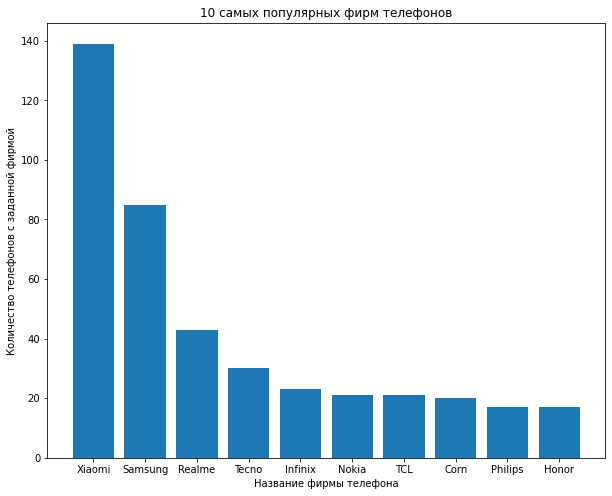

In [928]:
plt.figure(figsize=(10, 8))
popular_brands = df['Name of brand'].value_counts()[:10]
plt.bar(popular_brands.index, popular_brands)
plt.xlabel('Название фирмы телефона')
plt.ylabel('Количество телефонов с заданной фирмой')
plt.title('10 самых популярных фирм телефонов');

Визуально распределение похоже на экспоненциальное. Можем увидеть, что телефоны бренда Xiaomi встречаются чаще всего. Также достаточно распространены модели Samsung и Realme. 

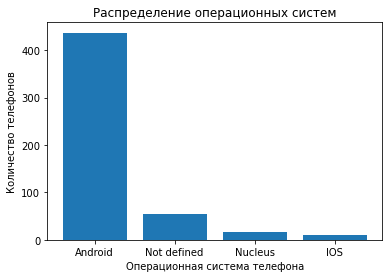

In [929]:
plt.bar(df['Operating system'].value_counts().index, df['Operating system'].value_counts());
plt.xlabel('Операционная система телефона')
plt.ylabel('Количество телефонов')
plt.title('Распределение операционных систем');

На графике можно заметить, что большинство телефонов с операционной системой - Android. Таким образом, для построения модели машинного обучения необходимо будет научиться сравнивать и определять различие между телефонами Android, чтобы лучшим образом прогнозировать цену. А также важно будет в целом учитывать операционную систему телефона, так как от нее будет сильно зависить ценовые границы. К примеру, можно заметить, что телефоны с операционной системой Nucleus, в большинстве, проивзодит Philips, поэтому цены на такие телефоны не сильно высокие. 

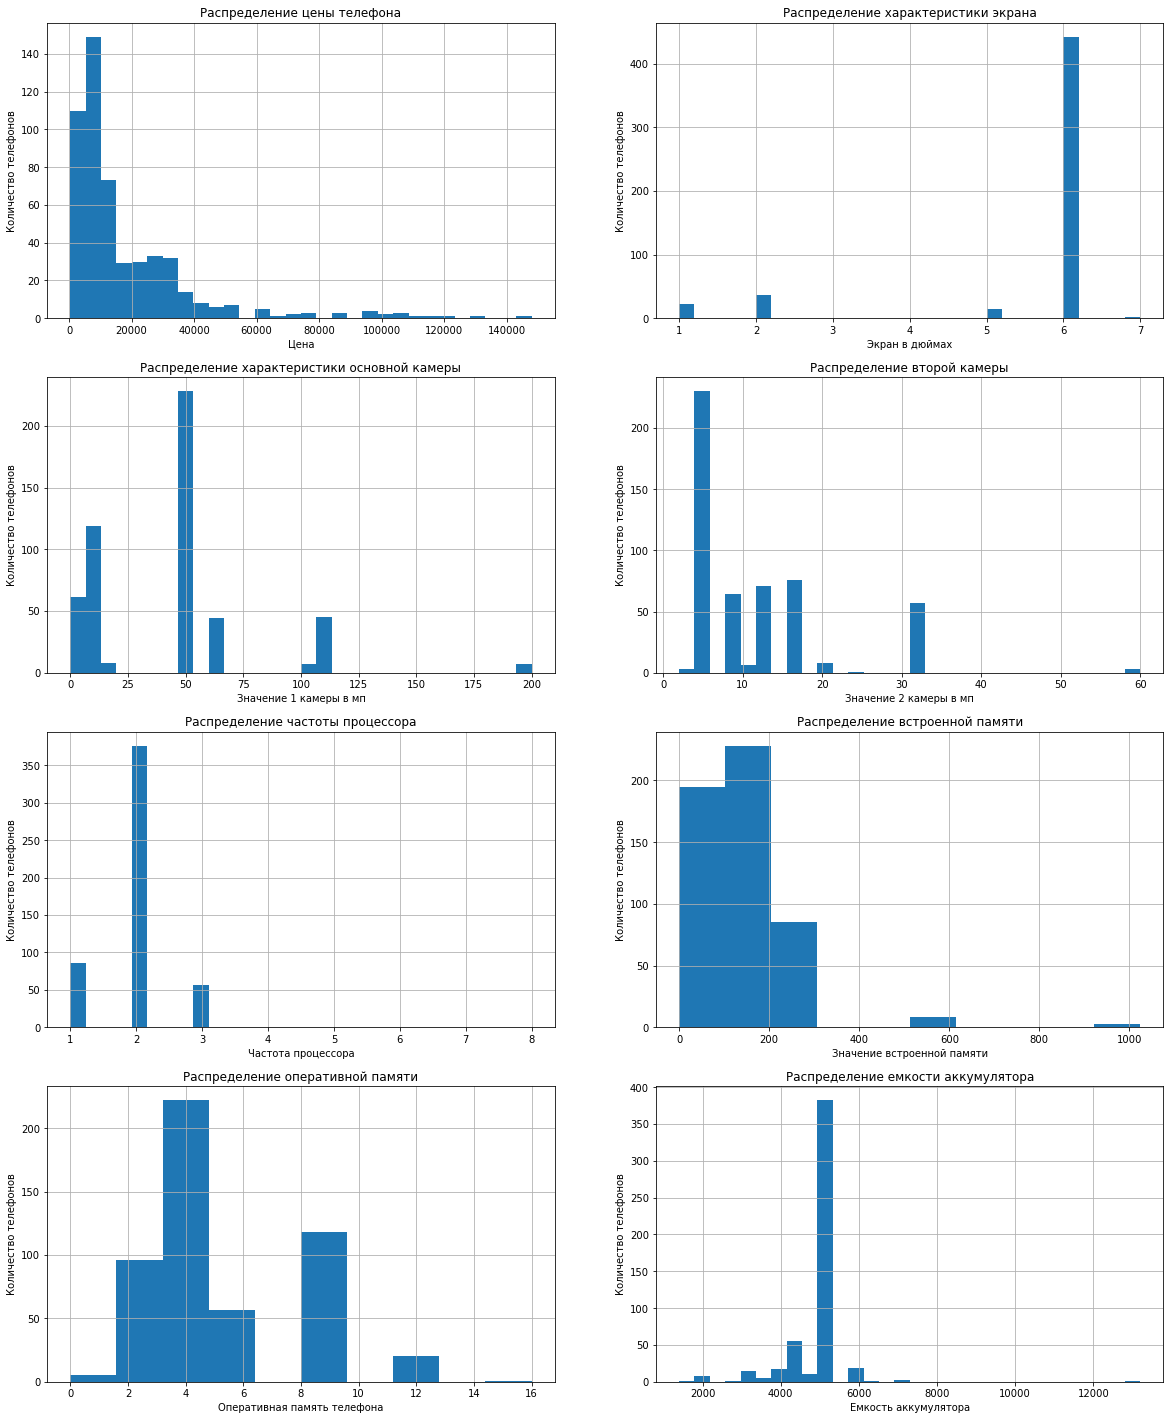

In [930]:
plt.figure(figsize=(20, 25))

sp = plt.subplot(421)
df['Price'].hist(bins=30)
plt.xlabel('Цена')
plt.ylabel('Количество телефонов')
plt.title('Распределение цены телефона');

sp = plt.subplot(422)
df['Inch'].hist(bins=30)
plt.xlabel('Экран в дюймах')
plt.ylabel('Количество телефонов')
plt.title('Распределение характеристики экрана');

sp = plt.subplot(423)
df['Main camera'].hist(bins=30)
plt.xlabel('Значение 1 камеры в мп')
plt.ylabel('Количество телефонов')
plt.title('Распределение характеристики основной камеры');

sp = plt.subplot(424)
df['Second camera'].hist(bins=30)
plt.xlabel('Значение 2 камеры в мп')
plt.ylabel('Количество телефонов')
plt.title('Распределение второй камеры');

sp = plt.subplot(425)
df['Processor rate'].hist(bins=30)
plt.xlabel('Частота процессора')
plt.ylabel('Количество телефонов')
plt.title('Распределение частоты процессора');

sp = plt.subplot(426)
df['Internal memory'].hist(bins=10)
plt.xlabel('Значение встроенной памяти')
plt.ylabel('Количество телефонов')
plt.title('Распределение встроенной памяти');

sp = plt.subplot(427)
df['RAM'].hist(bins=10)
plt.xlabel('Оперативная память телефона')
plt.ylabel('Количество телефонов')
plt.title('Распределение оперативной памяти');

sp = plt.subplot(428)
df['Battery'].hist(bins=30)
plt.xlabel('Емкость аккумулятора')
plt.ylabel('Количество телефонов')
plt.title('Распределение емкости аккумулятора');

На каждом графике можно заметить значения, которые похожи на выбросы. Например, на графике с распределением основной камеры телефона есть несколько выбросов больше 175. Аналогично на графике с внутренней памятью выбросы со значениями больше 800. 
Лучше всего их удалить, так как иначе некоторые предпосылки для проверки гипотез будут нарушены, а так же выбросы могут оказать негативное влияние на ML. 

Таким образом, удалим выбросы в основных характеристиках смартфонов.

Также на основе визуализаций можно выдвинуть гипотезу о том, что распределение частоты процессора имеет нормальное распределение. Проверим это в дальнейшем.

In [931]:
df = df[df['Screen'] < 1500]
df = df[df['Main camera'] < 150]
df = df[df['Second camera'] < 50]
df = df[df['Processor rate'] < 4]
df = df[df['Internal memory'] < 800]
df = df[df['Battery'] < 8000]

Теперь попробуем найти определенные зависимости в признаках:

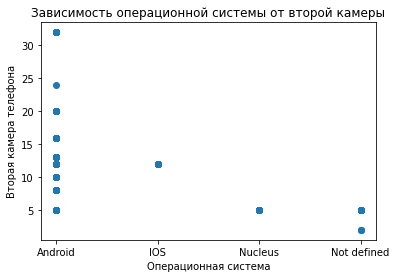

In [932]:
plt.scatter(df['Operating system'], df['Second camera'])
plt.xlabel('Операционная система')
plt.ylabel('Вторая камера телефона')
plt.title('Зависимость операционной системы от второй камеры');

Кажется, что у телефонов андроид значение второй камеры лучше, чем у других телефонов.

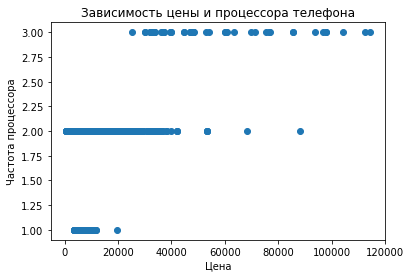

In [933]:
plt.scatter(x=df['Price'], y=df['Processor rate'])
plt.xlabel('Цена')
plt.ylabel('Частота процессора')
plt.title('Зависимость цены и процессора телефона');

Чем ниже цена, то меньше значение частоты процессора. Также на графике можно увидеть, что процессор принимает только 3 значения. Визуально кажется, что можно построить модель классификации (на 3 класса).

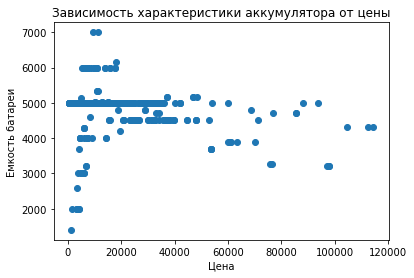

In [934]:
plt.scatter(x=df['Price'], y=df['Battery'])
plt.xlabel('Цена')
plt.ylabel('Емкость батареи')
plt.title('Зависимость характеристики аккумулятора от цены');

Кажется, что зависимости между ценой и аккамулятором не наблюдается. Эту гипотезу необходимо будет проверить в дальнейшем. 

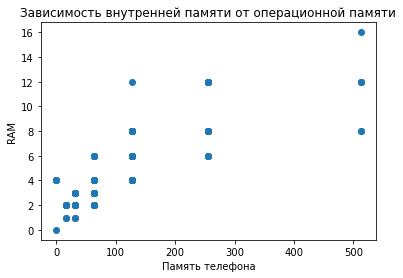

In [935]:
plt.scatter(x=df['Internal memory'], y=df['RAM'])
plt.xlabel('Память телефона')
plt.ylabel('RAM')
plt.title('Зависимость внутренней памяти от операционной памяти');

В начале графика можно заметить небольшую зависимость: чем больше внутренняя память, тем больше оперативная память. Однако далее зависимость, скорее всего, пропадает.

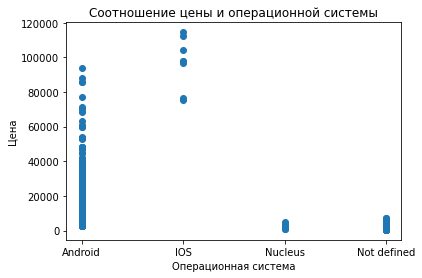

In [936]:
plt.scatter(df['Operating system'], df['Price'])
plt.xlabel('Операционная система')
plt.ylabel('Цена')
plt.title('Соотношение цены и операционной системы');

На графике можно заметить, что телефоны с операционной системой IOS стоят в среднем чуть больше, чем другие. Отдельно стоит отметить,что телефоны Nucleus и с неопределенной операционной системой стоят очень мало. В основном, это были кнопочные телефоны, либо очень дешевые телефоны с плохими характеристиками.

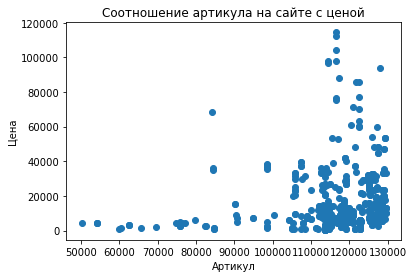

In [937]:
plt.scatter(df['Articul'], df['Price'])
plt.xlabel('Артикул')
plt.ylabel('Цена')
plt.title('Соотношение артикула на сайте с ценой');

На графике кажется, что зависимости нет, однако также будет интересно проверить гипотезу о зависимости между артикулом и ценой на телефон. Возможно, что артикул телефону присваивается не рандомно, а по некоторому правилу (в зависимости от цены).

Теперь построим тепловую диаграмму, чтобы в целом посмотреть на корреляции между численными переменными датафрейма.

/var/folders/db/n7ph30_n6793fmm710rhb95m0000gn/T/ipykernel_9490/690442803.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


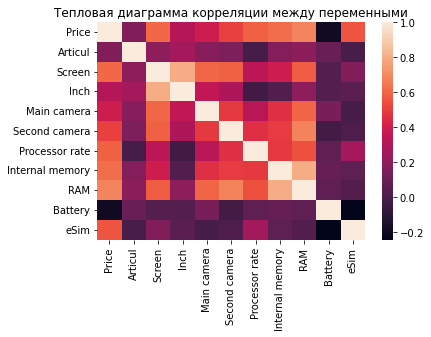

In [1053]:
correlation = df.corr()
sns.heatmap(correlation)
plt.title('Тепловая диаграмма корреляции между переменными');

Можем заметить, что артикул и цена имееют очень маленький коэффициент корреляции. Также баттареию и цена имеют совсем небольшую отрицательную взаимосвязь. Проверим обе эти гипотезы в дальнейшем. В целом можем заметить, что с ценой наибольшим образом коррелируют память (как внутренняя, так и операционная) и частота процессора.

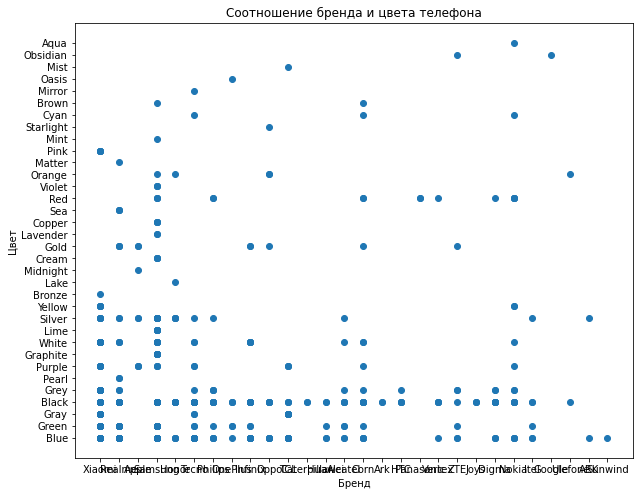

In [938]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Name of brand'], df['Color'])
plt.xlabel('Бренд')
plt.ylabel('Цвет')
plt.title('Соотношение бренда и цвета телефона');

Можно заметить, что почти у всех брендов есть телефоны черного цвета. Также достаточно популярны серый, голубой и белый цвета. Это можно заметить и в построенной ниже круговой диаграмме. Эти данные можно использовать в гипотезах.

In [1055]:
all_colors = df['Color'].value_counts()[:13]  # посмотрим на первые 13 цветов, остальные встречаются слишком редко

others = 0
for color in df['Color'].value_counts().index:
    if color not in all_colors:
        others += df['Color'].value_counts()[color]
        
all_colors = all_colors.append(pd.Series(others, name='others'))

/var/folders/db/n7ph30_n6793fmm710rhb95m0000gn/T/ipykernel_9490/3208617560.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_colors = all_colors.append(pd.Series(others, name='others'))


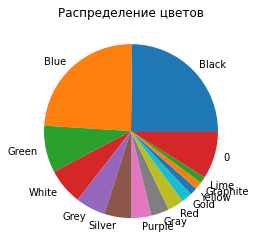

In [1056]:
plt.pie(all_colors, labels=all_colors.index)
plt.title('Распределение цветов');

### Проверка гипотез.

1. айфон в среднем стоит дороже чем андроид
2. цвет не влияет на цену телефона
3. цена и батарея независимы
4. цена и артикул независимы
5. частота процессора имеет нормальное распределение
6. телефоны андроид имеют лучшие характеристики второй камеры
7. цена не зависит от вариации цветов телефона

Все гипотезы будут проверяться на уровне значимости 5%.

1.Проверим гипотезу о равенстве математических ожиданий цены айфона и цены на операционной системе андроид с помощью t-теста. Предпосылки: большое n, независимость выборок и отсутствие выбросов соблюдаются. Использовала t-test, так как буду использовать выборочную дисперсию.

In [984]:
alpha = 0.05  
y = df[df['Operating system'] == 'Android'].Price
x = df[df['Operating system'] == 'IOS'].Price

diff = x.mean() - y.mean() 
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/ny)
                                    
t_obs = diff/diff_std    
t_crit = stats.t.ppf(1 - alpha, nx+ny-2) 

In [985]:
print(f'Наблюдаемое значение статистики = {t_obs}')
print(f'Критическое значение статистики = {t_crit}')

Наблюдаемое значение статистики = 15.256214665922842
Критическое значение статистики = 1.6484049694330078


z-obs > z-crit, поэтому гипотеза о равенстве математических ожиданий отвергается. Так как мы рассматривали нодносторонную альтернативу, что можно сделать вывод, что айфоны действительно стоят дороже.

2.Теперь проверим гипотезу о том, что цвет не влияет на цену телефона. Возьмем для сравнения black и blue телефоны (самых распорстраненных цветов). Проверим с помощью теста Манна-Уитни.

In [986]:
df['Color'].value_counts()[:2]

Black    125
Blue     122
Name: Color, dtype: int64

In [987]:
df_black = df['Price'][df['Color'] == 'Black']
df_blue = df['Price'][df['Color'] == 'Blue']

Для того, чтобы тест Манна-Уитни сработал, распределение телефонов разных цветов должно быть из одного распределения. Посмотрим на это.

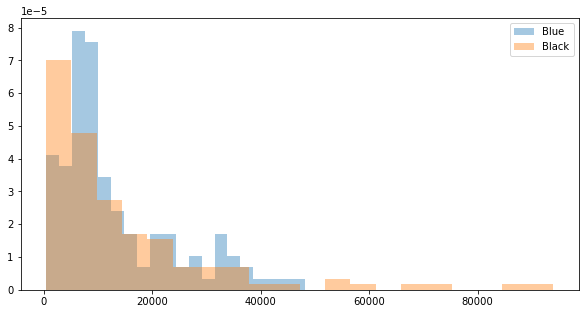

In [988]:
plt.figure(figsize=(10,5))
plt.hist(df_blue, bins=20, density=True, alpha=0.4, label='Blue')
plt.hist(df_black, bins=20, density=True, alpha=0.4, label='Black')
plt.legend();

Визуально кажется, что выборки из одного распределения. Можем применить тест Манна-Уитни. Использую именно его, так как есть длинные хвосты в данных, поэтому обычный z-tets омжет дать ложные результаты.

In [990]:
_, pval = stats.mannwhitneyu(df_black, df_blue, alternative='two-sided')
pval

0.18272238831963517

P-value > alpha, поэтому нет оснований отвергнуть гипотезу о том, что цвет не влияет на цену телефона.

Теперь попробуем проверить эту же гипотезу с помощью бутстрапа. 

In [991]:
def get_bootstrap_sample(x, B_sample=1):
    N = x.size 
    sample = np.random.choice(x, size=(N, B_sample), replace=True)
    
    if B_sample == 1:
        sample = sample.T[0]
    return sample

In [992]:
x_boot = get_bootstrap_sample(df_black, B_sample=10**4)
x_boot = np.median(x_boot, axis=0)

y_boot = get_bootstrap_sample(df_blue, B_sample=10**4)
y_boot = np.median(y_boot, axis=0)

In [993]:
def stat_intervals(boot, alpha=0.05):
    left = np.quantile(boot, alpha/2)
    right = np.quantile(boot, 1-alpha/2)
    return left, right

In [994]:
stat_intervals(x_boot - y_boot)

(-3450.0, 1700.0)

Ноль попадает в доверительный интервал, значит нет оснований отвергнуть гипотезу. 

3.Проверим гипотезу, которая возникла в ходе визуализации о том, что батарея и цена на телефон независимы. Будем делать это с помощью критерия согласия Пирсона.

In [995]:
df_pr_bat = df[['Price', 'Battery']]
df_pr_bat

,Price,Battery
0,11790,5000
1,8350,5000
2,15350,5000
3,14850,5000
4,8350,5000
...,...,...
514,26990,5000
515,28990,5000
516,28990,5000
517,28990,5000


In [996]:
df_pr_bat.min()

Price       379
Battery    1400
dtype: int64

In [997]:
df_pr_bat.max()

Price      114490
Battery      7000
dtype: int64

In [1001]:
matrix = pd.crosstab(df_pr_bat['Battery'], pd.cut(df['Price'], [0, 10000, 20000, 30000, 40000, 60000, 80000, 100000, 120000]))

In [1005]:
matrix = np.array(matrix)
matrix[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [8, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [7, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 3, 0]])

In [1006]:
from scipy.stats import chi2_contingency
chi2_contingency(matrix)[:3]

(1348.6223044771289, 2.5505439832308402e-183, 168)

p-value < alpha, поэтому гипотезу о том, что признаки независимы можно отвергнуть.

4.Аналогично проверим гипотезу о независимости цены и артикула, которая была интересна в процессе визуализаций.

In [1007]:
df_pr_art = df[['Price', 'Articul']]
df_pr_art

,Price,Articul
0,11790,111788
1,8350,114089
2,15350,126457
3,14850,126955
4,8350,112138
...,...,...
514,26990,118992
515,28990,118995
516,28990,118994
517,28990,118996


In [1008]:
matrix_2 = pd.crosstab(df_pr_art['Articul'], pd.cut(df['Price'], [0, 20000, 40000, 60000, 80000, 100000, 120000]))
matrix_2 = np.array(matrix_2)
matrix_2[:5]

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [1009]:
from scipy.stats import chi2_contingency
chi2_contingency(matrix_2)[:3]

(2520.0, 0.46817772686629217, 2515)

p-value > alpha, поэтому гипотеза не отвергается. Таким образом, артикул телефона действительно не зависит от цены.

5. Теперь проверим гипотезу о том, что данные по частоте процессора распределены нормально. Для этого воспользуемся встроенным в scipy тестом на нормальность.

In [1010]:
from scipy.stats import normaltest

In [1011]:
_, p_val = normaltest(df['Processor rate'])
print(p_val)

0.01785142558901523


p-value < alpha = 0.05, поэтому гипотезу можно отвергнуть. Данные по частота процессора только визуально напоминают нормальное распределение. На самом деле, они соответствуют другому распределению.

6.Проверим гипотезу о том, что у телефонов андроид в среднем вторая камера лучше с помощью t-теста.

In [1012]:
from scipy.stats import ttest_ind

In [1013]:
android = df['Second camera'][df['Operating system'] == 'Android']
other = df['Second camera'][df['Operating system'] != 'Android']

In [1014]:
_, p_value = ttest_ind(android, other, equal_var=False)
print(p_value)

5.6187040107013134e-36


p-value < alpha, поэтому можно сделать вывод о том, что телефоны на базе Android имеют лучшее значение второй камеры, чем другие телефоны.

7.Проверим еще одну гипотезу о том, что вариация цветов телефона никак не влияет не стоимость.

In [1015]:
df[df['Operating system'] == 'Android'].groupby(['Name of brand'])['Color'].unique()  # смотрим какие есть возможные цвета у каждого бренда

Name of brand
ARK                                               [Blue, Silver]
Ark                                                      [Black]
Caterpillar                                              [Black]
Google                                                [Obsidian]
HTC                                                [Black, Grey]
Honor                        [Black, Silver, Lake, Blue, Orange]
Huawei                                      [Blue, Black, Green]
Infinix                        [Black, Gold, Blue, Green, White]
Itel                                [Silver, Blue, Black, Green]
Nokia          [Blue, Red, Yellow, Aqua, Black, Purple, Cyan,...
OnePlus                              [Green, Blue, Black, Oasis]
Oppo                      [Gold, Black, Orange, Starlight, Blue]
Realme         [Black, Pearl, White, Silver, Green, Blue, Sea...
Samsung        [Graphite, Blue, Purple, Lime, Black, White, S...
TCL                            [Blue, Gray, Black, Purple, Mist]
Tecno      

In [1016]:
from scipy.stats import f_oneway  # буду использовать функции из библиотеки для проведения однофакторного дисперсионного анализа

groups = df.groupby('Name of brand')

means = groups['Price'].mean()
variances = groups['Price'].var()

_, p_val = f_oneway(*[group['Price'] for name, group in groups])
print(p_val)

2.1613815237392325e-71


p_value < alpha, поэтому гипотеза о независимости отвергается. Таким образом, цена телефона зависит от вариации цветов данной модели.

### Машинное обучение.

Я буду предсказывать цену телефона, основываясь на других числовых переменных, то есть решать задачу линейной регрессии. В качестве метрик использую mae, r2.

In [1017]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [1018]:
y = df['Price']
X = df.drop(columns=['Price'])
feature_names = X.columns.values

numeric_features = X.select_dtypes([np.number]).columns
categorical_features = X.dtypes[X.dtypes == "object"].index

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111) 

Необходимо сделать нормирование переменных, так как в нашем датафрейме характеристики сильно различаются по диапазонам и измеряются в разных единицах. К числовым применю стандартизацию, а к категориальным переменным OneHotEncoder. 

In [1019]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),    
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

In [1020]:
print("Кол-во признаков до OneHot:", X_train.shape[1])
print("Кол-во признаков после OneHot:", column_transformer.fit_transform(X_train).shape[1])

Кол-во признаков до OneHot: 15
Кол-во признаков после OneHot: 535


Можно заметить, что количество признаков сильно увеличилось после OneHotEncoding. Наверное, лучше оставить только самые основные категориальные признаки, иначе количество переменных становится больше, чем количество наблюдений.
Оставим колонки Name of brand, Color. Сделаем еще раз. 

In [1021]:
numeric_features = X.select_dtypes([np.number]).columns
categorical_features = [X.dtypes[X.dtypes == "object"].index[2], X.dtypes[X.dtypes == "object"].index[4]]

In [1022]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),    
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

In [1023]:
print("Кол-во признаков до OneHot:", X_train.shape[1])
print("Кол-во признаков после OneHot:", column_transformer.fit_transform(X_train).shape[1])

Кол-во признаков до OneHot: 15
Кол-во признаков после OneHot: 70


Однако, чтобы не возникло переобучения, необходимо использовать регуляризацию. Я решила использовать Лассо, так как, возможно, какие-то признаки никак не влияют на цену (например, цвет телефона, гипотезу о котором мы проверяли выше), поэтому возможность зануления некоторых признаков в данном случае может пригодиться.

In [1024]:
from sklearn.metrics import r2_score, mean_absolute_error

In [1025]:
lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(f'MAE на тестовой выборке = {mean_absolute_error(y_test, y_pred)}')
print(f'MAE на обучающей выборке = {mean_absolute_error(y_train, y_pred_train)}')

MAE на тестовой выборке = 4505.494567576309
MAE на обучающей выборке = 3399.435091967365


In [1026]:
print(f'R2 на тестовой выборке = {r2_score(y_test, y_pred)}')
print(f'R2 на обучающей выборке = {r2_score(y_train, y_pred_train)}')

R2 на тестовой выборке = 0.8578017807599634
R2 на обучающей выборке = 0.9163488330731547


Можем увидеть, что модель уже работает достаточно неплохо, однако улучшим ее через подбор гиперпараметра.

In [1027]:
alphas = np.logspace(-2, 3, 20)

searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}], cv=10, n_jobs=-1)

searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]

/Users/dasasoloveva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2611631255.3241434, tolerance: 11806997.097332874
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/dasasoloveva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3114221990.2215843, tolerance: 12459668.080406614
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/dasasoloveva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3020966953.533087, tolerance: 11681967.757742148
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/dasasoloveva/opt/an

In [1028]:
best_alpha

7.847599703514607

In [1029]:
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model_with_alpha = pipeline.fit(X_train, y_train)
y_pred_new = model_with_alpha.predict(X_test)
y_pred_train_new = model_with_alpha.predict(X_train)

print(f'MAE на тестовой выборке = {mean_absolute_error(y_test, y_pred_new)}')
print(f'MAE на обучающей выборке = {mean_absolute_error(y_train, y_pred_train_new)}')

MAE на тестовой выборке = 4393.910019717524
MAE на обучающей выборке = 3474.1611148525208


In [1030]:
print(f'R2 на тестовой выборке = {r2_score(y_test, y_pred_new)}')
print(f'R2 на обучающей выборке = {r2_score(y_train, y_pred_train_new)}')

R2 на тестовой выборке = 0.8611594009400217
R2 на обучающей выборке = 0.9146776949909068


Заметим, что обе метрики улучшились в качестве на тестовой выборке, но ухудшились на обучающей выборке. Возможно, это связано с переобучением нашей модели. После подбора гиперпараметра модель стала меньше "запоминать" обучающую выборку, стала лучше прогнозировать данные на тестовой. 

Выведем список прзинаков, которые Lasso-регрессия занулила:

In [1031]:
lasso = pipeline.named_steps['regression']
zero_coef_features = [feature for feature, coef in zip(X.columns, lasso.coef_) if coef == 0]
zero_coef_features

['Battery', 'Operating system', 'Color']

Попробуем уменьшить количество признаков с помощью SelectFromModel для выбора наиболее важных признаков.

In [1032]:
from sklearn.feature_selection import SelectFromModel

In [1033]:
selector = SelectFromModel(pipeline.named_steps['regression'], threshold=0.1, prefit=False)
X_new = selector.fit_transform(X[numeric_features], y)

selected_features = selector.get_support()
selected_columns = X[numeric_features].columns[selected_features]

In [1034]:
numeric_features_new = selected_columns
numeric_features_new  # только выбранные численные переменные

Index(['Screen', 'Inch', 'Main camera', 'Second camera', 'Processor rate',
       'Internal memory', 'RAM', 'Battery', 'eSim'],
      dtype='object')

In [1035]:
X_train_new = X_train[numeric_features_new]  # выберем только те признаки, которые остались после SelectFromModel
X_test_new = X_test[numeric_features_new]

scaler = StandardScaler()
sc = scaler.fit(X_train_new)
X_train_scaled = sc.transform(X_train_new)  # скалируем
X_test_scaled = sc.transform(X_test_new)

In [1036]:
model = Lasso(best_alpha)

model_with_alpha = model.fit(X_train_scaled, y_train)
y_pred_select = model_with_alpha.predict(X_test_scaled)
y_pred_train_select = model_with_alpha.predict(X_train_scaled)

print(f'MAE на тестовой выборке = {mean_absolute_error(y_test, y_pred_select)}')
print(f'MAE на обучающей выборке = {mean_absolute_error(y_train, y_pred_train_select)}')

MAE на тестовой выборке = 4853.690285555464
MAE на обучающей выборке = 4727.514335026559


In [1037]:
print(f'R2 на тестовой выборке = {r2_score(y_test, y_pred_select)}')
print(f'R2 на обучающей выборке = {r2_score(y_train, y_pred_train_select)}')

R2 на тестовой выборке = 0.8588899376979893
R2 на обучающей выборке = 0.8320130195392885


Можнем заметить, что метрики ухудшились, поэтому откажемся от использования SelectFromModel.

Теперь попробуем использовать градиентный бустинг. Используем pipeline, как и ранее, в котором первым этапом будет скалирование численных переменных и OneHotEncoding категориальных переменных.

In [1038]:
from xgboost import XGBRegressor

In [1039]:
boost_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('boost', XGBRegressor())
])

In [1040]:
model_boost = boost_pipeline.fit(X_train, y_train)

y_pred_boost = model_boost.predict(X_test)
y_pred_train_boost = model_boost.predict(X_train)

print(f'MAE на тестовой выборке = {mean_absolute_error(y_test, y_pred_boost)}')
print(f'MAE на обучающей выборке = {mean_absolute_error(y_train, y_pred_train_boost)}')

MAE на тестовой выборке = 1728.6589150003867
MAE на обучающей выборке = 113.13599798992905


In [1041]:
print(f'R2 на тестовой выборке = {r2_score(y_test, y_pred_boost)}')
print(f'R2 на обучающей выборке = {r2_score(y_train, y_pred_train_boost)}')

R2 на тестовой выборке = 0.9239692615243094
R2 на обучающей выборке = 0.9999198424313334


Бустинг справляется значительно лучше. Подберем гиперпараметры. 

In [1042]:
param_grid = {
    'boost__learning_rate': [0.1, 0.2, 0.3],
    'boost__max_depth': [3, 4, 5, 6, 10],
    'boost__n_estimators': [100, 200, 300, 1000]
}

In [1043]:
grid_search = GridSearchCV(boost_pipeline, param_grid, cv=4, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('ohe_and_scaling',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         Index(['Articul', 'Screen', 'Inch', 'Main camera', 'Second camera',
       'Processor rate', 'Internal memory', 'RAM', 'Battery', 'eSim'],
      dtype='object')),
                                                                        ('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Name '
                                                                          'of '
                                                                          'brand',
                                                                          'Color'])])),
                                       ('boost',
                                        XGBRe...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             param_grid={'boost__learning_rate': [0.1, 0.2, 0.3],
                         'boost__max_depth': [3, 4, 5, 6, 10],
                         'boost__n_estimators': [100, 200, 300, 1000]},
             scoring='neg_mean_absolute_error')

In [1044]:
best = grid_search.best_params_
best

{'boost__learning_rate': 0.3,
 'boost__max_depth': 3,
 'boost__n_estimators': 1000}

In [1045]:
y_pred_boost_params = grid_search.predict(X_test)
y_pred_train_boost_params = grid_search.predict(X_train)

In [1046]:
print(f'MAE на тестовой выборке = {mean_absolute_error(y_test, y_pred_boost_params)}')
print(f'MAE на обучающей выборке = {mean_absolute_error(y_train, y_pred_train_boost_params)}')

MAE на тестовой выборке = 1810.7445044187036
MAE на обучающей выборке = 21.888258486764308


In [1047]:
print(f'R2 на тестовой выборке = {r2_score(y_test, y_pred_boost_params)}')
print(f'R2 на обучающей выборке = {r2_score(y_train, y_pred_train_boost_params)}')

R2 на тестовой выборке = 0.9274394011673006
R2 на обучающей выборке = 0.9999972308584238


Таким образом, нам удалось обучить модель таким образом, что значение R2 очень близко к единице. Также и MAE значительно снизилась относительно самой первой модели. 